<a href="https://colab.research.google.com/github/ravishankarramakrishnan/Deep_Learning_Practice/blob/master/ML_ASSN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importing the Libraries

import tensorflow as tf
import numpy as np
import pandas as pd
print(tf.__version__)

import warnings
warnings.filterwarnings('ignore')


1.15.0


In [0]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt', sep='\t', header=None)

In [0]:
data.head()

,0,1,2,3
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [0]:
columns = 'Blue', 'Green', 'Red', 'Target'

In [0]:
data.columns = columns

In [0]:
data.tail()

,Blue,Green,Red,Target
245052,163,162,112,2
245053,163,162,112,2
245054,163,162,112,2
245055,163,162,112,2
245056,255,255,255,2


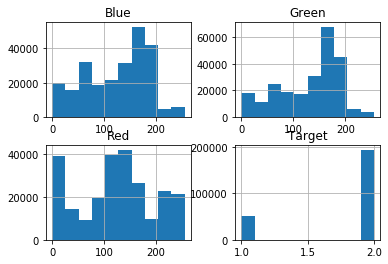

In [0]:
# Check the Distribution of Data

data.hist();

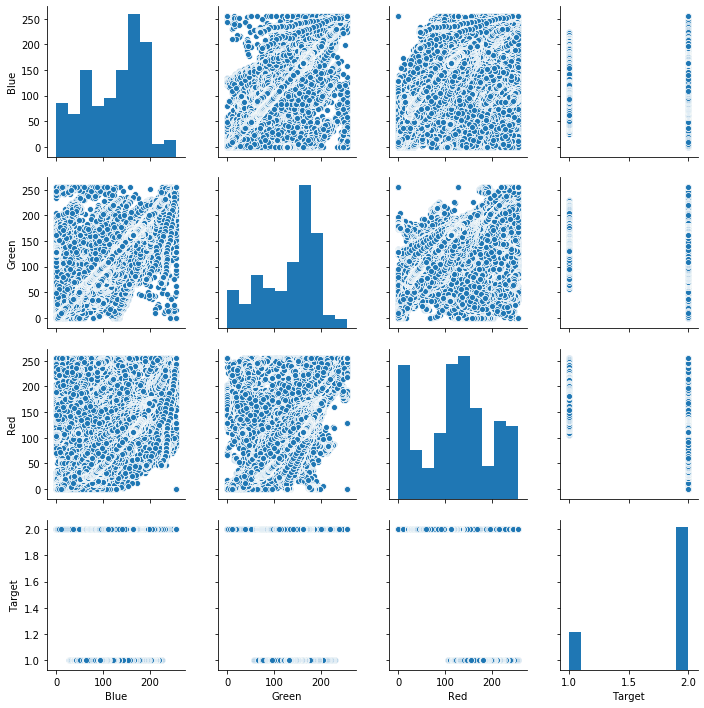

In [0]:
import seaborn as sns
sns.pairplot(data)

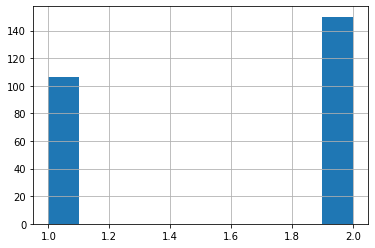

In [0]:
# Check the Histogram

data.Target.groupby(data.Red).nunique().hist();

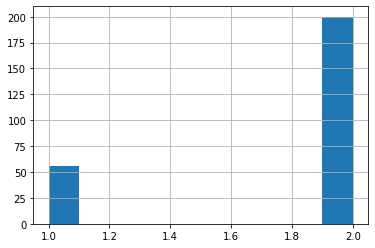

In [0]:
# Check the Histogram

data.Target.groupby(data.Blue).nunique().hist();

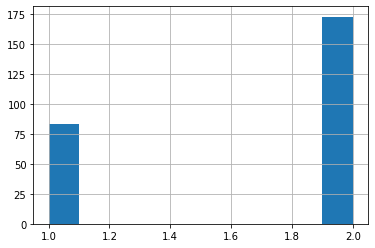

In [0]:
# Check the Histogram

data.Target.groupby(data.Green).nunique().hist();

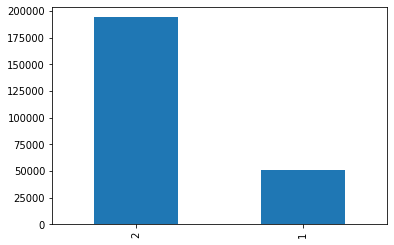

In [0]:
# Check the Target distribution

data.Target.value_counts().plot(kind='bar')

In [0]:
# Check the Shape of the Dataset
data.shape


(245057, 4)

In [0]:
# Check type of data
type(data)


pandas.core.frame.DataFrame

In [0]:
X = data.iloc[:,0:3]
y = data.iloc[:,3:]

In [0]:
X

,Blue,Green,Red
0,74,85,123
1,73,84,122
2,72,83,121
3,70,81,119
4,70,81,119
...,...,...,...
245052,163,162,112
245053,163,162,112
245054,163,162,112
245055,163,162,112


In [0]:
y

,Target
0,1
1,1
2,1
3,1
4,1
...,...
245052,2
245053,2
245054,2
245055,2


In [0]:
# Model Building

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state = 42)


In [0]:
print('Length of X train:',len(X_train))
print('Length of X test :',len(X_test))
print('Length of Y train:',len(y_train))
print('Length of Y test :',len(y_test))


Length of X train: 164188
Length of X test : 80869
Length of Y train: 164188
Length of Y test : 80869


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics


# all parameters not specified are set to their defaults
lr = LogisticRegression()

# Evaluate Using CrossValidation

from sklearn import model_selection


num_instances = len(X)
kfold = model_selection.KFold(n_splits=10, random_state=42)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


Accuracy: 86.103% (17.052%)


In [0]:
# Train a Logistic regression model for the dataset.

# Fit the Model
lr.fit(X_train, y_train)
# 7. Compute the accuracy and confusion matrix. 

y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.92


In [0]:
# Use Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[13756  2917]
 [ 3625 60571]]


In [0]:
# Improve the Model With Knn with 10 neighbors

# check classification accuracy of KNN with K=5

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)


0.9993446190752946

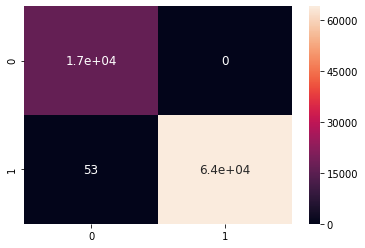

In [0]:
# Use Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
# Plot the Confusion Matrix
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 12})# font size


In [0]:
# Get the Numbers and Dimensions for Entering into Deep Learning Input Layer Size
N,D = X_train.shape


In [0]:
# Scale the Data for even distribution of Range across Features

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


In [0]:
model = Sequential()
model.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [0]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

(245057, 3)

In [0]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])


In [0]:
model.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 10, verbose = 1)


Train on 164188 samples
Epoch 1/10
164188/164188 [==============================] - 38s 229us/sample - loss: -719326.6503 - acc: 0.2082
Epoch 2/10
164188/164188 [==============================] - 37s 226us/sample - loss: -7722117.6807 - acc: 0.2082
Epoch 3/10
164188/164188 [==============================] - 37s 223us/sample - loss: -28570151.0805 - acc: 0.2082
Epoch 4/10
164188/164188 [==============================] - 38s 230us/sample - loss: -70332414.3664 - acc: 0.2082
Epoch 5/10
164188/164188 [==============================] - 37s 224us/sample - loss: -140152298.5719 - acc: 0.2082
Epoch 6/10
164188/164188 [==============================] - 37s 226us/sample - loss: -244908891.4044 - acc: 0.2082
Epoch 7/10
164188/164188 [==============================] - 37s 226us/sample - loss: -391752836.5695 - acc: 0.2082
Epoch 8/10
164188/164188 [==============================] - 37s 224us/sample - loss: -586995402.1956 - acc: 0.2082
Epoch 9/10
164188/164188 [==============================] - 37s

In [0]:
y_pred = model.predict_classes(X_test)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [0]:
confusion_matrix(y_test, y_pred)


array([[16673,     0],
       [   53, 64143]])

In [0]:
accuracy_score(y_test, y_pred)


0.9993446190752946